## 1. 데이터 확인

In [1]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 경고 제거
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [4]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


+ Age, Cabin, Embarked에 결측치가 존재함을 알 수 있다.
+ 어떻게 채울지 고민해봐야 할 것이다.

In [9]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Madsen, Mr. Fridtjof Arne",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


+ include='all'과 다르게 Dtype이 int64, float64인 경우만 보여줌을 알 수 있다.
## 2. 파일 병합

In [11]:
ntrain = train.shape[0] # train set의 행 수 저장
ntest = test.shape[0] # test set의 행 수 저장

y_train = train['Survived'].values # 생존(정답)
passId = test['PassengerId'] # 맞춰야 할 승객 id

# 병합하기
data = pd.concat((train,test))

# 각 크기 출력
print('train set size is {}'.format(train.shape))
print('test set size is {}'.format(test.shape))
print('data size is {}'.format(data.shape))


train set size is (891, 12)
test set size is (418, 11)
data size is (1309, 12)


## 3. 파일 탐색


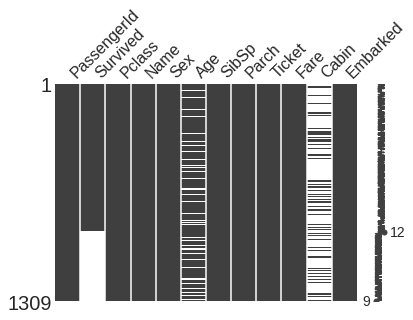

In [13]:
# 결측치 시각화
plt.style.use('seaborn-whitegrid')
missingno.matrix(data, figsize=(6,4))

In [16]:
print(data.isnull().sum())
print(data.isnull().any())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool


null값을 처리하자
## 4. EDA(Exploratory Data Analysis)

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


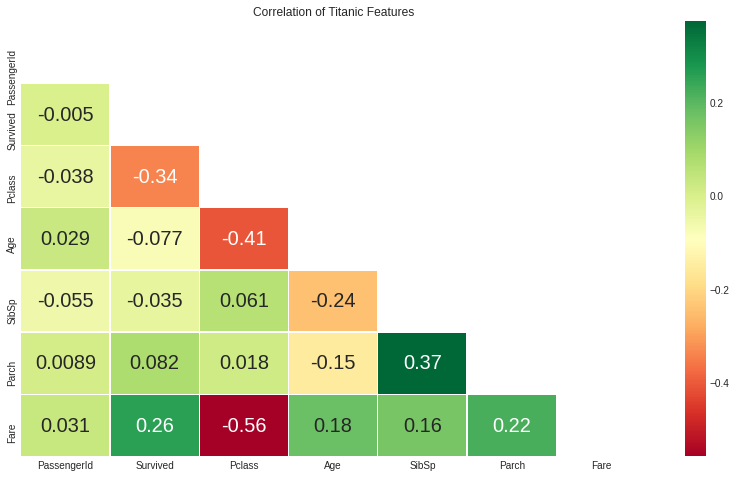

In [29]:
# 각 열의 상관관계 확인
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 그래프 셋업
plt.figure(figsize=(14,8))
plt.title('Correlation of Titanic Features')
sns.heatmap(corr,mask=mask, annot= True, annot_kws={'size':20}, cmap='RdYlGn', linewidths=0.3)
plt.show()

### 4-1 Pclass 분석

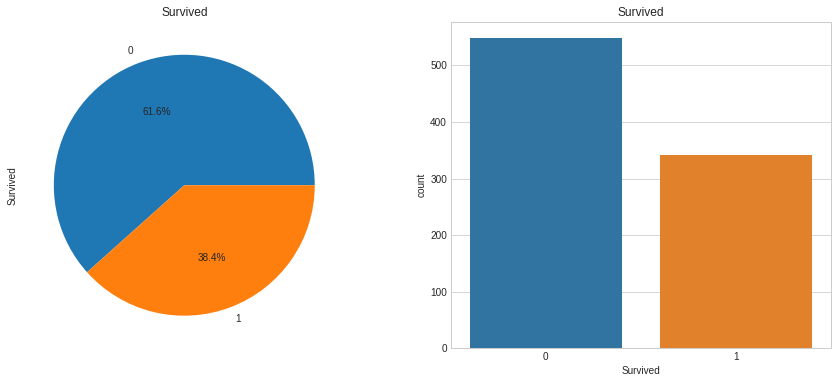

In [35]:
f, ax = plt.subplots(1, 2, figsize=(15,6))
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Survived')
sns.countplot('Survived',data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [45]:
# 클래스 별 생존자
train.groupby(['Pclass','Survived'])['Survived'].count()
pd.crosstab(train.Pclass, train.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


+ 1등 객실 : 생존자가 더 많음
+ 2등 객실 : 사망자가 조금 더 많음
+ 3등 객실 : 사망자가 훨씬 더 많음

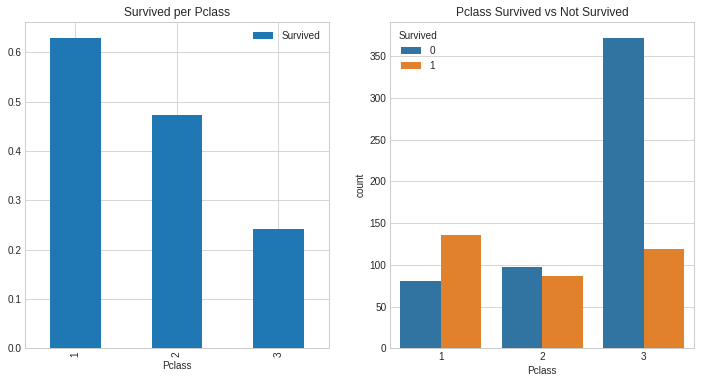

In [51]:
f, ax = plt.subplots(1,2,figsize=(12,6))
# 클래스 별 생존률
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pclass')
# 클래스 별 생존자, 사망자 수
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass Survived vs Not Survived')
plt.show()


+ 객실 등급이 높을수록 생존률이 높은 것을 알 수 있다.

### 4-2 Name 분석


In [ ]:
data.Name.value_counts()

Connolly, Miss. Kate                                2
Kelly, Mr. James                                    2
Moubarek, Mrs. George (Omine Amenia" Alexander)"    1
Wheeler, Mr. Edwin Frederick""                      1
Berriman, Mr. William John                          1
                                                   ..
Maisner, Mr. Simon                                  1
Nilsson, Miss. Berta Olivia                         1
Barkworth, Mr. Algernon Henry Wilson                1
Mitkoff, Mr. Mito                                   1
Meanwell, Miss. (Marion Ogden)                      1
Name: Name, Length: 1307, dtype: int64

+ 대부분의 이름이 다른데 어떻게 이용할까? ->호칭을 이용해보자
+ ['Initial']열을 만들어 데이터를 넣어주자


In [ ]:
temp = data.copy()
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z0-9]+)\.')
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Lady          1
Dona          1
Countess      1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Initial, dtype: int64

+ 이름 별 성별을 나타내보자

In [ ]:
pd.crosstab(temp.Sex, temp.Initial)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,260,2,1,0,198,2,0,0
male,1,4,0,1,7,1,0,2,61,0,0,0,757,0,0,8,1


+ 이름 별 생존률을 보자

In [ ]:
temp.groupby('Initial')['Survived'].mean()

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [ ]:
# Dona 처리(생존률 None이었기 때문)
temp.loc[temp['Initial'] == 'Dona','Initial'] = 'Mrs'

+ 컴퓨터는 숫자를 좋아하므로 이름을 추출하여 숫자로 변경한다.

In [ ]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')
temp['NumName'] = temp['LastName'].factorize()[0]

In [ ]:
pd.crosstab(temp.Survived, temp.NumName)

NumName,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,2,0,0,1,1,2,1,4,3,1,0,0,1,7,1,0,5,4,4,0,1,0,0,0,1,1,2,5,1,1,0,0,1,2,1,0,1,0,1,2,...,1,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1,1,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,1
1.0,0,1,1,1,1,1,0,0,3,1,2,1,0,2,0,1,0,1,0,1,0,1,1,1,3,0,2,4,0,0,1,1,0,1,1,1,0,2,0,0,...,0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0


### 4-3 Sex 분석

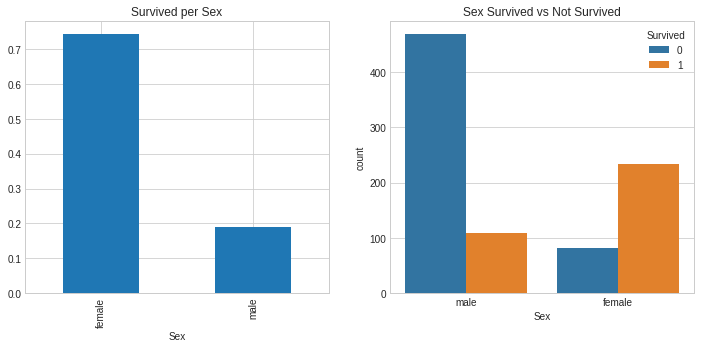

In [81]:
f, ax = plt.subplots(1,2,figsize=(12,5))
train.groupby(['Sex'])['Survived'].mean().plot(kind='bar',ax=ax[0])
ax[0].set_title('Survived per Sex')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Sex Survived vs Not Survived')
plt.show()

+ 남성 탑승자의 수가 훨씬 많지만 여자인 경우 생존률이 높음을 알 수 있다.
+ 남/여를 1,2로 나눌 수 있지만 아기인 경우를 따로 나눌수도 있을 것이다.
+ 추가로 클래스 별로 성별을 살펴보자.

In [83]:
pd.crosstab([train.Sex, train.Survived],train.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

+ 클래스가 높을수록, 성별이 여자인 경우 생존률이 높다.

In [ ]:
# 성능을 높이고자할 때 시도해보자
# temp['Gender'] = 0
# temp.loc[(temp['Sex']=='male') & (temp[Pclass]== 1) ,'Gender']= 1
# temp.loc[(temp['Sex']=='male') & (temp[Pclass]== 2) ,'Gender']= 2
# temp.loc[(temp['Sex']=='male') & (temp[Pclass]== 3) ,'Gender']= 2
# temp.loc[(temp['Sex']=='female') & (temp[Pclass]== 1) ,'Gender']= 3
# temp.loc[(temp['Sex']=='female') & (temp[Pclass]== 2) ,'Gender']= 4
# temp.loc[(temp['Sex']=='female') & (temp[Pclass]== 3) ,'Gender']= 5
# temp.loc[temp['Age']<1.0 ,'Gender']= 6

### 4-4 Age 분석


+ Age는 continuous값이며, 결측치가 많아 이를 처리하는 것이 핵심일 것이다.

In [84]:
data['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

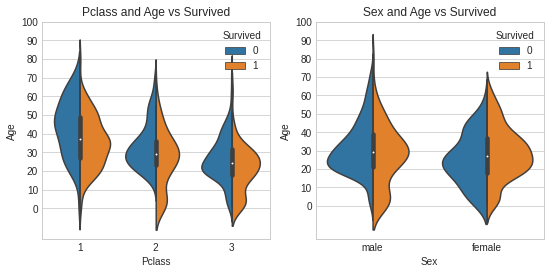

In [88]:
f, ax = plt.subplots(1,2,figsize=(9,4))
sns.violinplot('Pclass','Age',hue='Survived',data=train, split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

+ 클래스와 상관없이 10살 이하 어린이의 생존률을 높다.
+ 나이가 많을수록 남성의 생존률은 낮다.
+ 결측치를 채워보자.(Initial별 평균 연령을 Age에 적용하자.)


In [89]:
temp.groupby('Initial').agg({'Age':['mean','count']})

Age      
               mean count
Initial                  
Capt      70.000000     1
Col       54.000000     4
Countess  33.000000     1
Don       40.000000     1
Dr        43.571429     7
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     5.482642    53
Miss      21.774238   210
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.252151   581
Mrs       37.005848   171
Ms        28.000000     1
Rev       41.250000     8
Sir       49.000000     1

In [92]:
# 이니셜 별 평균 연령을 빈값에 넣기
temp = temp.reset_index(drop=True)
temp['Age'] = temp.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
# 이니셜 정리
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'], ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)
temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1], inplace=True)

In [104]:
temp['Age_Range'] = pd.qcut(temp['Age'], 10)
temp.groupby('Age_Range')['Survived'].mean()

Age_Range
(0.169, 16.0]     0.548077
(16.0, 21.0]      0.307692
(21.0, 23.0]      0.487179
(23.0, 26.0]      0.369863
(26.0, 30.0]      0.400000
(30.0, 32.252]    0.198718
(32.252, 33.0]    0.411765
(33.0, 39.0]      0.504762
(39.0, 48.0]      0.357143
(48.0, 80.0]      0.387500
Name: Survived, dtype: float64

In [105]:
# 나이 그룹화 설정
temp['Agroup'] = 0
temp.loc[temp['Age'] < 1.0, 'Agroup'] = 1
temp.loc[(temp['Age'] >=1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <=  20.0), 'Agroup'] = 18
temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <= 52.0), 'Agroup'] = 45
temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78
# 성별 설정
temp.loc[(temp['Sex'] == 'male'), 'Sex'] = 1
temp.loc[(temp['Sex'] == 'female'), 'Sex'] = 2
temp.loc[(temp['Age'] < 1), 'Sex'] = 3

#### Family or Alone
+ SibSp(혼자 or 가족) + Parch(부모) 분석
+ Alone과 Family 그룹으로 나누자.


In [106]:
temp.loc[(temp['SibSp'] == 0) & (temp['Parch'] == 0), 'Alone'] = 1
temp['Family'] = temp['Parch'] + temp['SibSp'] + 1

In [107]:
temp.groupby('Family')['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

+ 부모가 있는 경우 생존률이 높다. -> 소수의 가족인 귀족들을 위해 혼자인 사람 양보
+ 가족이 4명 이상인 경우 생존률이 낮다. -> 가족 일부를 버리고 탈 수 없는 비극

### 4-5 Fare 분석


In [108]:
temp['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

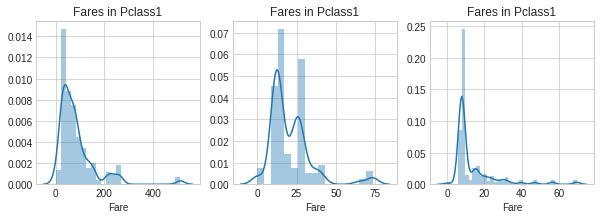

In [109]:
f, ax = plt.subplots(1,3,figsize=(10,3))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass1')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass1')
plt.show()

In [111]:
temp['Fare_Range'] = pd.qcut(train['Fare'],10)
temp.groupby('Fare_Range')['Fare'].mean()

Fare_Range
(-0.001, 7.55]         5.928717
(7.55, 7.854]          7.768490
(7.854, 8.05]          7.963669
(8.05, 10.5]           9.521367
(10.5, 14.454]        12.940231
(14.454, 21.679]      17.386408
(21.679, 27.0]        25.487501
(27.0, 39.688]        32.282186
(39.688, 77.958]      59.444572
(77.958, 512.329]    146.807086
Name: Fare, dtype: float64

In [112]:
# Fare 그룹화
temp['Fgroup'] = 0
temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9

### 4-6 Cabin 분석